In [117]:
"""
Numerically solving the fokker planck equation
#by Shane Gervais
#For the curriculum of MATH4503 with
#Dr. Sanjeev Seahra
#SID: 3620569
#last updated: 2022/03/26
"""

'\nNumerically solving the fokker planck equation\n#by Shane Gervais\n#For the curriculum of MATH4503 with\n#Dr. Sanjeev Seahra\n#SID: 3620569\n#last updated: 2022/03/26\n'

In [118]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [119]:
#Initial parameters
N = 200 #Number of grid lines (used as the same later)
L = 2 #Max length
kB = 1.380649E-23 #Boltzman constant
B = 1 #mobility
T = 300 #Kelvin
D = kB*B*T #Diffusion constant
l = 1 #Restoring force

#Initial condition
x0 = 0
y0 = 0
t0 = 0
#Time step and grid steps
h = 2
s = 2

In [120]:
"""
Fokker Planck FTCS stencil accepts a 
function f
Grid step h
Time step s
Number of grids i, j, k

Solves the Fokker Planck equation numerical from the FTCS method
and returns numerical solution u
"""

def fokkerPlanck(f, h, s, ni, nj, nk):
    
    #Parameters
    dx = h/ni
    dy = h/nk
    ds = s/nj
    
    #Set up array of results
    u = np.zeros((ni,nj,nk))
    
    #Include initial condition
    for i in range(0,nj-1):
        for j in range(0, ni-1):
            u[0][i] = f(i,j)
            #u[i][0][j] = f(j)

    #Conditions for x, y, r
    x = np.zeros(ni)
    y = np.zeros(nk)
    r = np.zeros((ni,nj))

    for i in range(0, ni-1):
        x[i] = x0 + i*dx

    for k in range(0, nk-1):
        y[k] = y0 + k*dy

    #Note r = r(x,y) defined by Pythagorus
    for i in range(0, ni-1):
        for j in range(0, nj-1):
            r[i][j] = np.sqrt(x[i]**2 + y[j]**2)

    #Boundary conditions
    for i in range(0,ni-1):
        u[i][0][0] = 1
        u[i][nj-1][nk-1] = 0
        
    #Solving Fokker Planck Equation numerically
    for t in range(0, ni-1):
        for s in range(1, nj-1):
            for q in range(1, nk-1):
                u[t+1][s][q] = u[t][s][q] + ds*l*B*(r[s][q]*((u[t][s+1][q] - u[t][s-1][q])/2*dx) + u[t][s][q]*(r[s+1][q] - r[s-1][q])/(2*dx) + 
                r[s][q]*(u[t][s][q+1] - u[t][s][q-1])/(2*dy) + u[t][s][q]*(r[s][q+1] - r[s][q-1])/(2*dy)) 
                + ds*D*((u[t][s+1][q] - 2*u[t][s][q] + u[t][s-1][q])/dx**2 + (u[t][s][q+1] - 2*u[t][s][q] + u[t][s][q-1])/dy**2)
    return u

In [121]:
#Create grid space
X, Y = np.meshgrid(np.linspace(0,L,N, dtype=float), np.linspace(0,L,N, dtype=float))

#Test function
def f(x,y):
    return np.exp(-x/100) + np.exp(-y/100)

uX = fokkerPlanck(f, h, s, N, N, N)

Text(0, 0.5, 'Y')

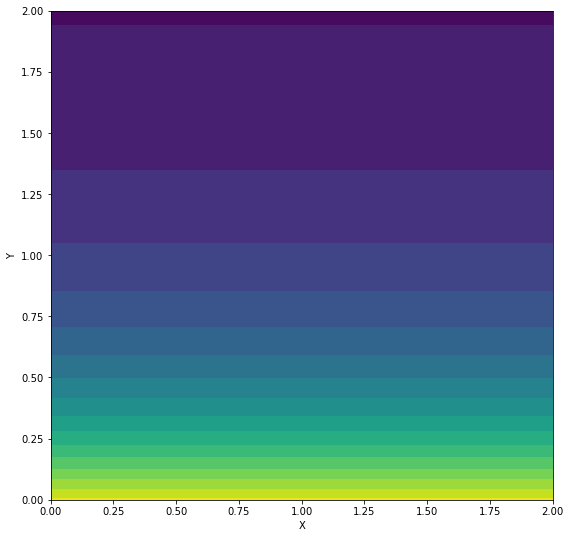

In [122]:
#Plot results in 2D
plt.figure(figsize=(9,9))
plt.contourf(X,Y,uX[0, :, :]**2, 20)
plt.xlabel("X")
plt.ylabel("Y")

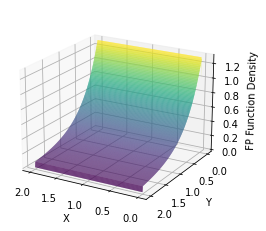

In [123]:
#Plotting results in 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, uX[0,:,:]**2, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("FP Function Density")

ax.view_init(20,120)